## Task name : Iris Flowers Classification ML Project || September2021

## Perform by : Mohammed Away Toumi

<img src="t1.png"/>

### Dataset : http://archive.ics.uci.edu/ml/datasets/Iris

### Importing Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading Data

In [12]:
iris = pd.read_csv("Iris.csv")

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# To display stats about data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Understanding the Data

In [15]:
iris.shape

(150, 6)

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking the number of rows that belongs to each class

In [21]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Data Visualization

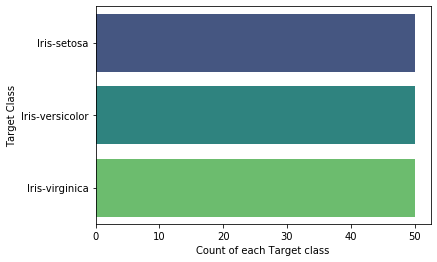

In [27]:
# Check the distribution of target variable to see if it's a case of unbalanced class
sns.countplot(y = 'Species', data = iris, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

Plotting multiple pairwise bivariate distributions in a dataset using pairplot:

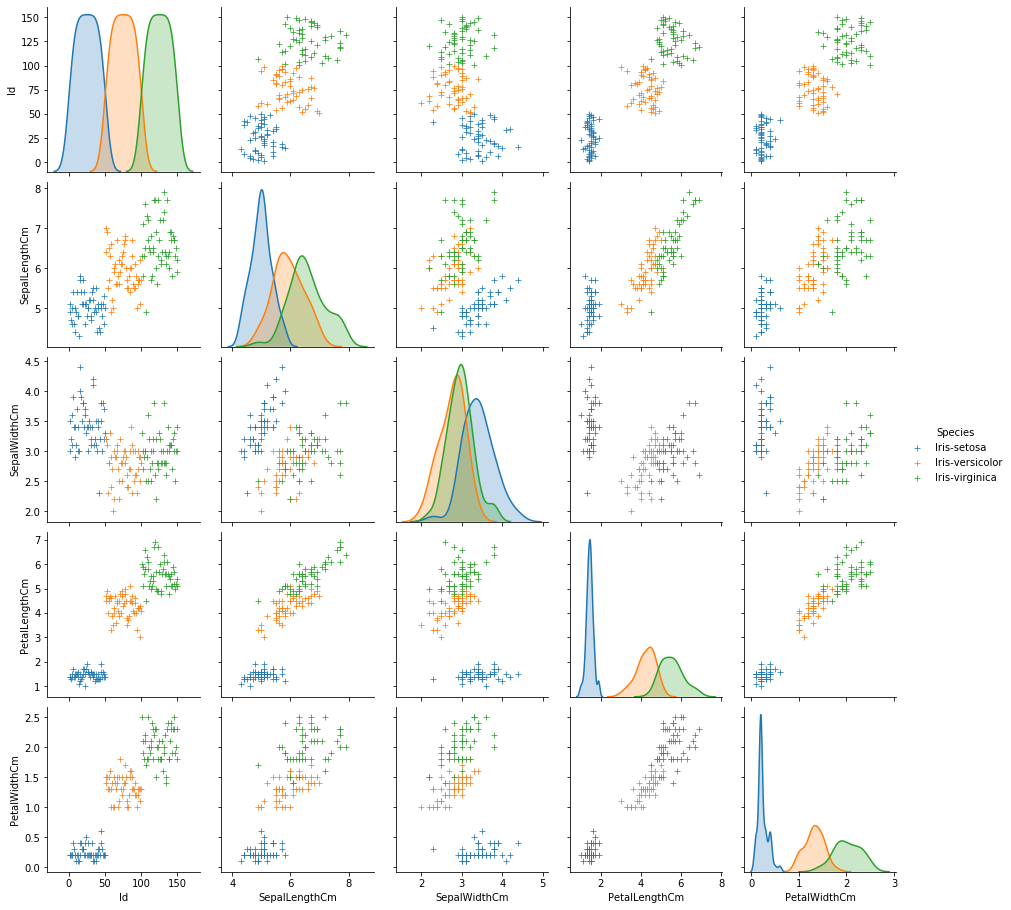

In [29]:
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

It shows that Iris-Setosa is separated from both other species in all the features.

Plotting the heatmap to check the correlation. dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

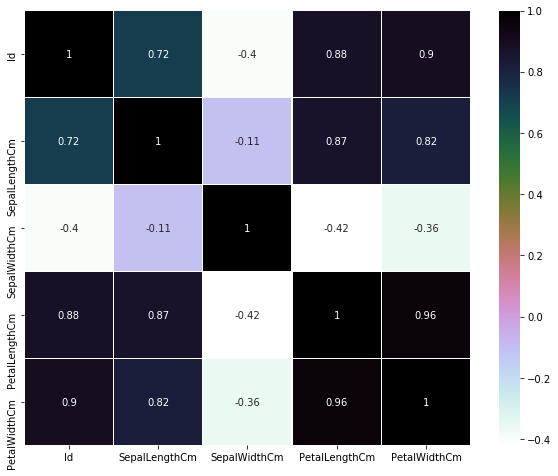

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r', linewidths=0.4)
plt.show()

### Model Building

Splitting the dataset

In [37]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 5) | y shape: (150,) 


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.33)

In [80]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Prediction and Performance Metric

In [82]:
knn_predict = knn_model.predict(X_test)

### Fitting method of the knn object

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predict method of the knn object

In [84]:
print(f"""
KNN Accuracy: {accuracy_score(y_test, knn_predict)}
""")


KNN Accuracy: 1.0



In [85]:
print(f"""
KNN Confusion Matrix: 
{confusion_matrix(y_test, knn_predict)},
""")


KNN Confusion Matrix: 
[[17  0  0]
 [ 0 17  0]
 [ 0  0 16]],



In [88]:
print(f"""
KNN Classification Report: 
{classification_report(y_test, knn_predict)},
""")


KNN Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50
,

